In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import mad_std
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


In [2]:
plt.rc('font', size=15)                  # controls default text sizes
plt.rc('axes', titlesize=15)             # fontsize of the axes title
plt.rc('axes', labelsize=15)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)            # fontsize of the tick labels
plt.rc('ytick', labelsize=15)            # fontsize of the tick labels
plt.rc('axes', linewidth=1)  
plt.rc('legend', fontsize=15)

In [3]:
d='GAIA_add_noise_to_1_star'

0.2663609837432264 0.7148812005002084


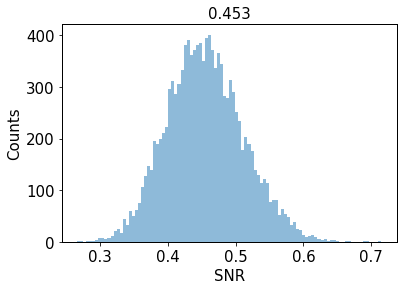

In [4]:
new=pd.read_csv('/Users/maryumsayeed/LLR_updates/Oct19/wnoise_simul_12348.txt',delimiter=' ',\
            names=['Factor','Wnoise','Fraction'],skiprows=1)
new_frac=np.array(new['Fraction'])
idx=np.where(new_frac>0)[0]
new_frac=new_frac[idx]
a=r"$\bf{star's}$"
median=round(np.median(new_frac),3)
plt.hist(new_frac,bins=100,alpha=0.5,label='')
plt.title(median)

plt.xlabel('SNR')
plt.ylabel('Counts')
print(new_frac.min(),new_frac.max())


SNR limit for Gaia sample:
0.5298040850354314 0.9916631929970822
Median 0.7528136723634847 

SNR limit for Seismic sample:
0.025844101709045438 1.0
Median 0.803251354731138


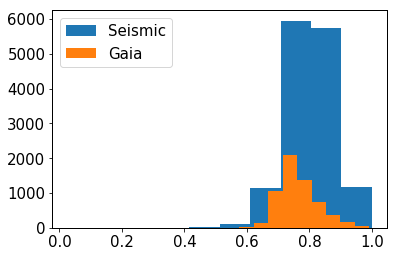

In [5]:
seismic=pd.read_csv('LLR_seismic/astero_wnoise_frac.txt',delimiter=' ',\
            names=['KICID','Fraction','Radius'],skiprows=1)
seismic_frac=np.array(seismic['Fraction'])
gaia=pd.read_csv('LLR_gaia/pande_wnoise_frac.txt',delimiter=' ',\
            names=['KICID','Fraction','Radius'],skiprows=1)
gaia_frac=np.array(gaia['Fraction'])
gidx=np.where(gaia_frac>0)[0]
sidx=np.where(seismic_frac>0)[0]

plt.hist(seismic_frac[sidx],label='Seismic')
plt.hist(gaia_frac[gidx],label='Gaia')
plt.legend()

print('SNR limit for Gaia sample:')
print(np.min(gaia_frac[gidx]),np.max(gaia_frac[gidx]))
print('Median',np.median(gaia_frac[gidx]),'\n')
print('SNR limit for Seismic sample:')
print(np.min(seismic_frac[sidx]),np.max(seismic_frac[sidx]))
print('Median',np.median(seismic_frac[sidx]))


In [6]:
filename='LLR_gaia/Gaia_Sample_v4.csv'
df = pd.read_csv(filename,index_col=False)
df = df[df['Outlier']==0]
gt0,gp0,gsnr0=df['True_Logg'],df['Inferred_Logg'],df['SNR']
gaia_good_kics=np.array(df['KICID'])

gaia_files=np.loadtxt(d+'/pande_final_sample_full.txt',delimiter=' ',usecols=[0],dtype=str)#[want_idx]

filename='LLR_seismic/Seismic_Sample_v4.csv'
df = pd.read_csv(filename,index_col=False)
df = df[df['Outlier']==0]
st0,sp0,ssnr0=df['True_Logg'],df['Inferred_Logg'],df['SNR']
seismic_good_kics=np.array(df['KICID'])

seismic_files=np.loadtxt(d+'/astero_final_sample_full.txt',delimiter=' ',usecols=[0],dtype=str)#[want_idx]

In [7]:
def get_gaia(dirr):
    start,e=0,5964
    true,pred,snr=[],[],[]
    print(dirr)
    for i in range(0,len(gaia_files)):
        t=np.load(d+dirr+'/testlabels.npy')[start+i]
        s=np.load(d+dirr+'/snr_vals.npy')[i]
        p=np.load(d+dirr+'/labels_m1.npy')[i]
        f=gaia_files[i]
        kicid=int(f.split('/')[-1].split('-')[0].split('kplr')[-1].lstrip('0'))
        if kicid in gaia_good_kics:
            true.append(t)
            pred.append(p)
            snr.append(s)
    return true,pred,snr

def get_seismic(dirr):
    snr=np.load(d+dirr+'/snr_vals.npy')
    start,e=5964,5964+len(snr)
    true,pred,snr=[],[],[]
    print(dirr)
    for i in range(0,len(seismic_files)):
        t=np.load(d+dirr+'/testlabels.npy')[start+i]
        s=np.load(d+dirr+'/snr_vals.npy')[i]
        p=np.load(d+dirr+'/labels_m1.npy')[i]
        f=seismic_files[i]
        kicid=int(f.split('/')[-1].split('-')[0].split('kplr')[-1].lstrip('0'))
        if kicid in seismic_good_kics:
            true.append(t)
            pred.append(p)
            snr.append(s)
    return true,pred,snr
    

In [8]:
gt05,gp05,gsnr05=get_gaia('/gaia_0.5')
gt1,gp1,gsnr1=get_gaia('/gaia_1')
gt2,gp2,gsnr2=get_gaia('/gaia_2')
gt3,gp3,gsnr3=get_gaia('/gaia_3')
gt4,gp4,gsnr4=get_gaia('/gaia_4')
gt5,gp5,gsnr5=get_gaia('/gaia_5')
gt6,gp6,gsnr6=get_gaia('/gaia_6')

/gaia_0.5
/gaia_1
/gaia_2
/gaia_3
/gaia_4
/gaia_5
/gaia_6


In [9]:
gaia_true=np.concatenate([gt0,gt05,gt1,gt2,gt3,gt4,gt5,gt6])
gaia_pred=np.concatenate([gp0,gp05,gp1,gp2,gp3,gp4,gp5,gp6])
gaia_snr =np.concatenate([gsnr0,gsnr05,gsnr1,gsnr2,gsnr3,gsnr4,gsnr5,gsnr6])
gaia_diff=gaia_true-gaia_pred

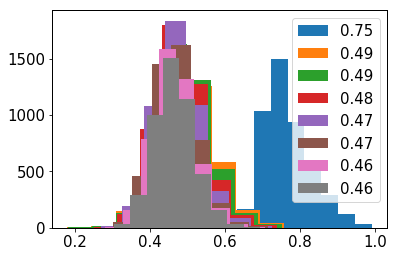

In [10]:
plt.hist(gsnr0,label='{0:.2f}'.format(np.median(gsnr0)))
plt.hist(gsnr05,label='{0:.2f}'.format(np.median(gsnr05)))
plt.hist(gsnr1,label='{0:.2f}'.format(np.median(gsnr1)))
plt.hist(gsnr2,label='{0:.2f}'.format(np.median(gsnr2)))
plt.hist(gsnr3,label='{0:.2f}'.format(np.median(gsnr3)))
plt.hist(gsnr4,label='{0:.2f}'.format(np.median(gsnr4)))
plt.hist(gsnr5,label='{0:.2f}'.format(np.median(gsnr5)))
plt.hist(gsnr6,label='{0:.2f}'.format(np.median(gsnr6)))
plt.legend()

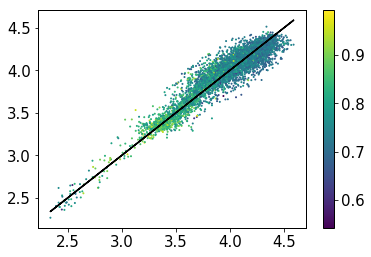

In [11]:
plt.scatter(gt0,gp0,c=gsnr0,s=1)
plt.plot(gt0,gt0,c='k')
plt.colorbar()

In [12]:
st05,sp05,ssnr05=get_seismic('/seismic_0.5')
st1,sp1,ssnr1=get_seismic('/seismic_1')
st2,sp2,ssnr2=get_seismic('/seismic_2')
st3,sp3,ssnr3=get_seismic('/seismic_3')
st4,sp4,ssnr4=get_seismic('/seismic_4')
st5,sp5,ssnr5=get_seismic('/seismic_5')
st6,sp6,ssnr6=get_seismic('/seismic_6')

/seismic_0.5
/seismic_1
/seismic_2
/seismic_3
/seismic_4
/seismic_5
/seismic_6


In [13]:
seismic_true=np.concatenate([st0,st05,st1,st2,st3,st4,st5,st6])
seismic_pred=np.concatenate([sp0,sp05,sp1,sp2,sp3,sp4,sp5,sp6])
seismic_snr =np.concatenate([ssnr0,ssnr05,ssnr1,ssnr2,ssnr3,ssnr4,ssnr5,ssnr6])
seismic_diff=seismic_true-seismic_pred


In [14]:
gaia_with_noise_snr    =np.concatenate([gsnr05,gsnr1,gsnr2,gsnr3,gsnr4,gsnr5,gsnr6])
seismic_with_noise_snr =np.concatenate([ssnr05,ssnr1,ssnr2,ssnr3,ssnr4,ssnr5,ssnr6])

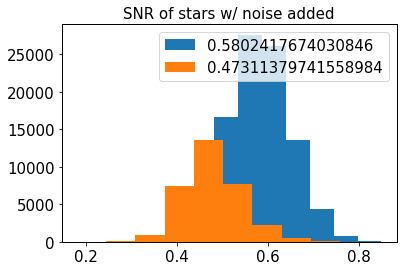

In [15]:
plt.hist(seismic_with_noise_snr,label=np.median(seismic_with_noise_snr))
plt.hist(gaia_with_noise_snr,label=np.median(gaia_with_noise_snr))
plt.title('SNR of stars w/ noise added')
plt.legend()

In [16]:
len(gt0)*8

37168

In [17]:
len(seismic_diff)

110576

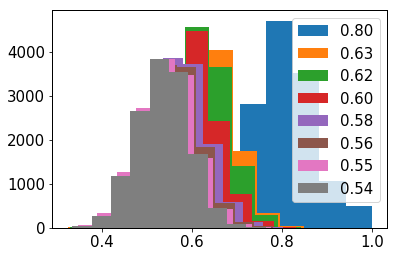

In [18]:
plt.hist(ssnr0,label='{0:.2f}'.format(np.median(ssnr0)))
plt.hist(ssnr05,label='{0:.2f}'.format(np.median(ssnr05)))
plt.hist(ssnr1,label='{0:.2f}'.format(np.median(ssnr1)))
plt.hist(ssnr2,label='{0:.2f}'.format(np.median(ssnr2)))
plt.hist(ssnr3,label='{0:.2f}'.format(np.median(ssnr3)))
plt.hist(ssnr4,label='{0:.2f}'.format(np.median(ssnr4)))
plt.hist(ssnr5,label='{0:.2f}'.format(np.median(ssnr5)))
plt.hist(ssnr6,label='{0:.2f}'.format(np.median(ssnr6)))
plt.legend()

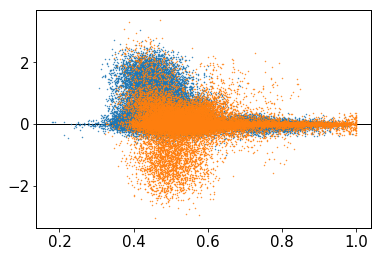

In [19]:
plt.scatter(gaia_snr,gaia_true-gaia_pred,s=0.2)
plt.scatter(seismic_snr,seismic_diff,s=0.2)
plt.xlabel('')
plt.axhline(0,c='k',lw=1,zorder=0)

In [20]:
snr=np.concatenate([list(gaia_snr),list(seismic_snr)])
diff=np.concatenate([list(gaia_diff),list(seismic_diff)])

In [21]:
len(snr)

147744

In [22]:
len(diff),len(gaia_diff)+len(seismic_diff)

(147744, 147744)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
50 50


/Users/maryumsayeed/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/maryumsayeed/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Total stars: 147744')

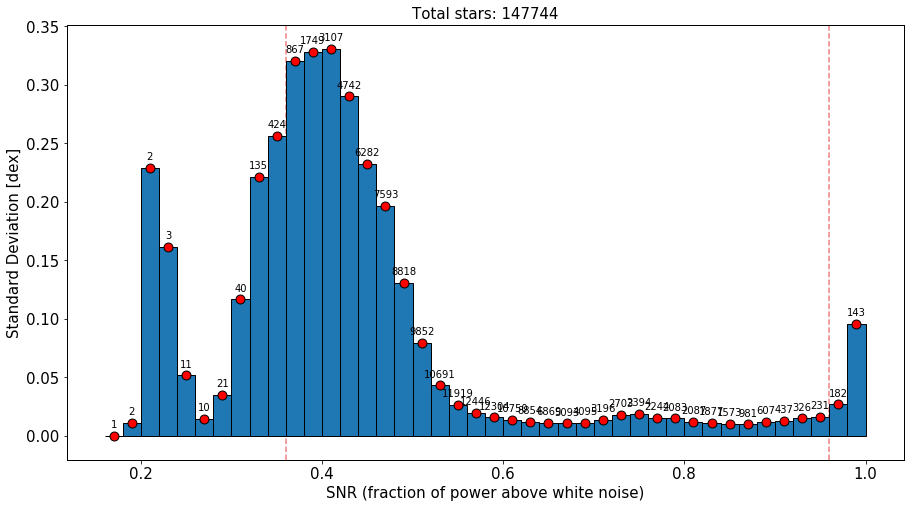

In [23]:
limits=np.arange(0.,1.02,0.02)

print(limits)

lower_lims=[]
upper_lims=[]
stdevs=[]
nstars=[]
errs=np.zeros(len(snr))
mid_limits=[]
for i in range(len(limits)-1):
    lower,upper=limits[i],limits[i+1]
    idx=np.where((snr>lower) & (snr<=upper))[0]
    std=mad_std(abs(diff[idx]))
    #std=np.std(diff[idx])
    nstars.append(len(idx))
    stdevs.append(std)
    errs[idx]=std
    lower_lims.append(lower)
    upper_lims.append(upper)
    mid=(upper-lower)/2.+lower
    mid_limits.append(mid)
#     print(lower,upper,mid,std,(len(idx)))

stdevs,nstars=np.array(stdevs),np.array(nstars)

# mid_limits=np.arange(0.225,1.,0.025*2)
# mid_limits=np.arange(0.2,0.94,0.02)
# mid_limits=limits

print(len(mid_limits),len(stdevs))
plt.figure(figsize=(15,8))
ax=plt.subplot(111)

plt.bar(mid_limits,stdevs,width=0.02,ec='k')
plt.axvline(0.36,c='lightcoral',linestyle='--',zorder=0)
plt.axvline(0.96,c='lightcoral',linestyle='--',zorder=0)
plt.scatter(mid_limits,stdevs,zorder=10,s=80,c='r',edgecolor='k')
plt.xlabel('SNR (fraction of power above white noise)')
plt.ylabel('Standard Deviation [dex]')
import math
for i in range(0,len(nstars)):
    n=nstars[i]
    xpos=mid_limits[i]
    ypos=stdevs[i]
    if math.isnan(ypos) is False:
        t=ax.text(xpos,ypos+0.005,s='{0:.0f}'.format(n),color='k',ha='center',va='bottom',fontsize=10)
        t.set_bbox(dict(facecolor='none',edgecolor='none'))#, alpha=0.5, edgecolor='red'))

# plt.xlim(0.2,0.8)
plt.title('Total stars: {}'.format(np.sum(nstars)))
# plt.savefig('/Users/maryumsayeed/LLR_updates/July27/Maryum_3.png',bbox_inches='tight')

In [27]:
stdevs,nstars,mid_limits=np.array(stdevs),np.array(nstars),np.array(mid_limits)
i1=np.where((mid_limits>0.36) & (mid_limits<0.98))[0]

x,y,n=mid_limits[i1],stdevs[i1],np.log10(nstars[i1])
s0=3

def powerlaw(x, p):
    return p[0]*np.power(x,p[1])+p[2]

import scipy.optimize as optimization

def minimize(params, xdata, ydata):
    return (ydata - powerlaw(xdata, params))

x0,y0=x[s0:],y[s0:]
guess=np.array([0.0001,-8,0.01])
popt2,flag=optimization.leastsq(minimize, guess, args=(x0, y0))

print(popt2)
print(x[3])

[ 3.09961176e-04 -8.16743702e+00  8.03245957e-03]
0.43


In [28]:
np.arange(2.2,4.2,0.3)

array([2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ])

[2.2 2.5 2.8 3.1 3.4 3.7 4. ]


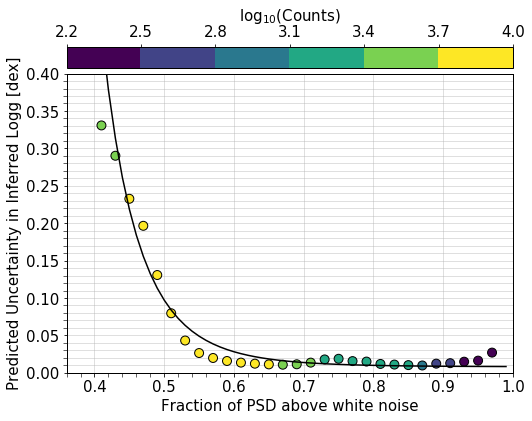

In [31]:

fig=plt.figure(figsize=(8,6))
ax=plt.subplot(111)
ax.set_axisbelow(True)

bounds = np.arange(2.2,4.2,0.3)
# bounds = np.linspace(2.2,4.7,8)

cmap = plt.get_cmap('viridis', 6)  #8=number of discrete cmap bins
print(bounds)


pi=2
im=plt.scatter(x[pi:],y[pi:],c=n[pi:],edgecolor='k',s=80,cmap=cmap)
xfit=np.arange(0.2,1.0,0.01)
plt.plot(xfit,powerlaw(xfit,popt2),c='k')
plt.xlim(0.36,1.0)
plt.ylim(0,0.4)


plt.xlabel('Fraction of PSD above white noise')
plt.ylabel('Predicted Uncertainty in Inferred Logg [dex]')
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-', alpha=0.5)
plt.grid(b=True, which='minor', linestyle='-', alpha=0.5,axis='y')
ax.tick_params(which='minor',length=4)

ax1_divider = make_axes_locatable(ax)
cax = ax1_divider.append_axes("top", size="7%", pad="2%")
cb  = fig.colorbar(im, cax=cax, orientation="horizontal",ticks=bounds,boundaries=bounds)#,cmap=cmap)

cb.set_label('$\log_{10}$(Counts)')
cax.xaxis.set_ticks_position('top')
cax.xaxis.set_label_position('top')

# idx=np.where(xp>=0.1)[0][0]
# maxerr=powerlaw(xp,popt2)[idx]
# plt.savefig('{}.png'.format(s0),bbox_inches='tight')

# for i in range(0,len(x)):
#     xpos=x[i]
#     ypos=y[i]
#     if math.isnan(ypos) is False:
#         t=ax.text(xpos,ypos+0.005,s='{0:.2f}'.format(n[i]),color='k',ha='center',va='bottom',fontsize=10)
#         t.set_bbox(dict(facecolor='none',edgecolor='none'))#, alpha=0.5, edgecolor='red'))
# plt.savefig('SNR_plot.png',dpi=100,bbox_inches='tight')
